In [1]:
#3 cnn Build the Image classification model by dividing the model into following 4 stages


In [3]:
#importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist






In [4]:
#load dataset mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
print(x_train.shape) 
# (BATCH SIZE, HEIGHT, WIDTH)

(60000, 28, 28)


In [7]:
x_train[0].min(), x_train[0].max() 
# (PIXEL INTENSITY) (0 = BLACK, 255 = WHITE)

(0, 255)

In [8]:
# normalixe the pixels of the images by scalin it to the range (0-1) 
x_train= x_train/255
x_test = x_test/255

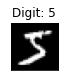

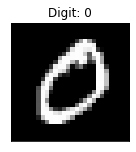

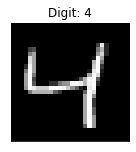

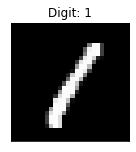

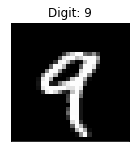

<Figure size 1152x720 with 0 Axes>

In [12]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
    plt.figure(figsize=(16, 10))
for i in range(5):
 plot_digit(x_train[i], y_train[i], plt, i)
plt.show()

In [13]:
x_train = x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))

In [14]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [15]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape =(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [18]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
model.fit(x_train,y_train,epochs = 10, batch_size= 32)

Epoch 1/10
1875/1875 [==============================] - 63s 27ms/step - loss: 0.2245 - accuracy: 0.9332
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0743 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0178 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0091 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 44s 23m

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)


In [25]:
print('Test loss:',score[0]) 

Test loss: 0.04298211261630058


In [26]:
print('Test accuracy:',score[1]) 

Test accuracy: 0.9869999885559082
